In [50]:
from langchain_ollama import OllamaLLM
import time

def time_to_first_token(llm, prompt):
    start = time.time()
    i = 0
    for chunk in llm.stream(prompt):
        return time.time() - start

llm = OllamaLLM(model="phi3.5", num_predict=1, keep_alive=300, temperature=0) # Keep llm loaded in GPU for 5 mins
sentences = [
    "The cat jumped quickly over the wooden fence.",
    "She enjoyed reading books on rainy afternoons.",
    "He plays the guitar beautifully every Friday night.",
    "The children laughed and played in the sunny park.",
    "I cooked dinner for my family and friends yesterday.",
    "They traveled to Japan for their vacation last year.",
    "The coffee shop opened early on cold winter mornings.",
    "She painted the walls of her room a bright yellow.",
    "He enjoys hiking through the mountains every summer.",
    "The dog barked loudly at the mailman in the morning."
]

for i in range(10):
    print(time_to_first_token(llm, sentences[i]))
    time.sleep(1)

1.5712077617645264
0.48143720626831055
0.41336703300476074
0.34163904190063477
0.34899306297302246
0.3341052532196045
0.36023998260498047
0.33864498138427734
0.31598806381225586
0.3344309329986572


In [51]:
import time
import matplotlib.pyplot as plt
from langchain_ollama import OllamaLLM

def plot_llm_streaming_times(llm, prompt):
    # Initialize lists to store time metrics
    ttft = None  # Time To First Token
    tpot = []    # Time Per Output Token (after the first one)
    
    i = 0
    start = time.time()

    # Stream the response and capture timing
    for chunk in llm.stream(prompt):
        if i == 0:
            ttft = time.time() - start  # Time To First Token
        else:
            tpot.append(time.time() - start)  # Time Per Output Token
        start = time.time()
        i += 1

    print(f'TTFT: {ttft:.4f}')
    print(f'AVG TPOT: {sum(tpot) / len(tpot):.4f}')

    # Plotting TTFT and TPOT
    if ttft is not None:
        plt.figure(figsize=(10, 5))

        # Plot Time To First Token (TTFT)
        plt.bar(0, ttft, color='blue', label='TTFT')

        # Plot Time Per Output Token (TPOT)
        plt.bar(range(1, len(tpot) + 1), tpot, color='green', label='TPOT')

        # Calculate and plot the average TPOT
        if len(tpot) > 0:
            avg_tpot = sum(tpot) / len(tpot)
            plt.axhline(y=avg_tpot, color='red', linestyle='--', label=f'Average TPOT: {avg_tpot:.4f} s')

        # Adding labels and title
        plt.xlabel("Token")
        plt.ylabel("Time (s)")
        plt.title(f"Time To First Token (TTFT) and Time Per Output Token (TPOT) for {len(prompt)} Input Tokens")
        plt.legend()

        # Show the plot
        plt.show()


TTFT: 0.7109
AVG TPOT: 0.0668


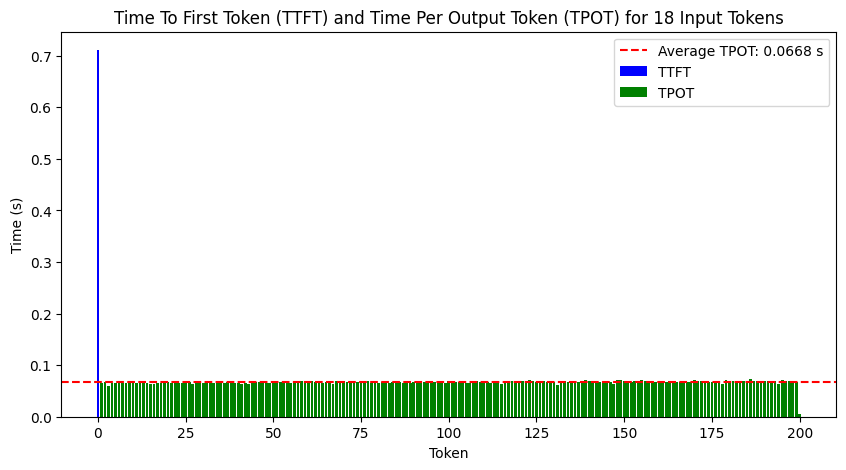

In [52]:
llm = OllamaLLM(model="phi3.5", num_predict=200)

# 6 tokens
prompt = "Write a love song." 

plot_llm_streaming_times(llm, prompt)


TTFT: 0.6743
AVG TPOT: 0.0682


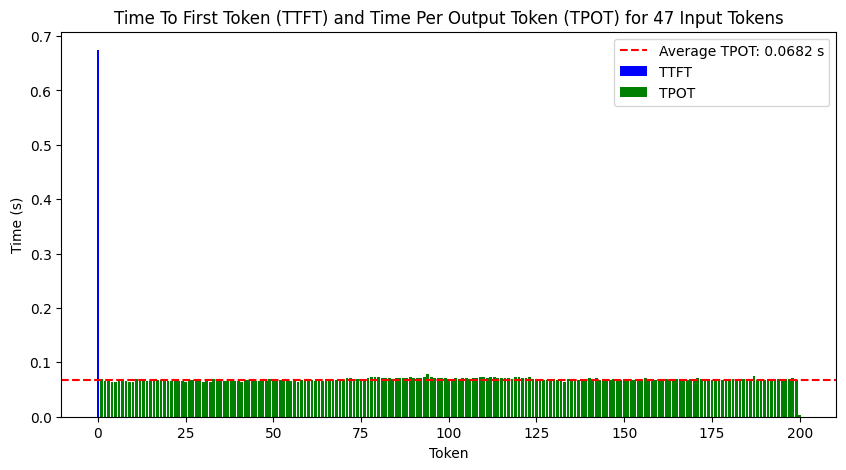

In [53]:
# 12 tokens
prompt = """Write a love song about a young couple in love."""

plot_llm_streaming_times(llm, prompt)

TTFT: 0.2485
AVG TPOT: 0.0694


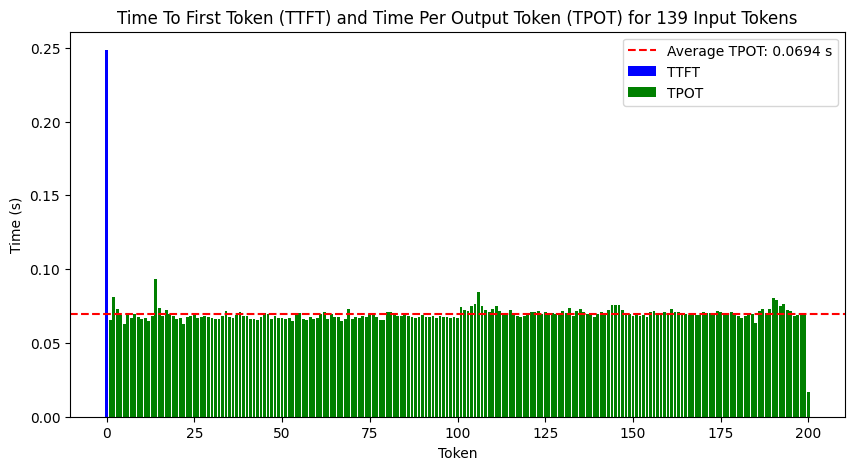

In [54]:
# 30 tokens
prompt = """Write a love song about a couple in love, reflecting on shared moments and their connection using vivid imagery and astonishing creativity."""

plot_llm_streaming_times(llm, prompt)

TTFT: 0.4952
AVG TPOT: 0.0696


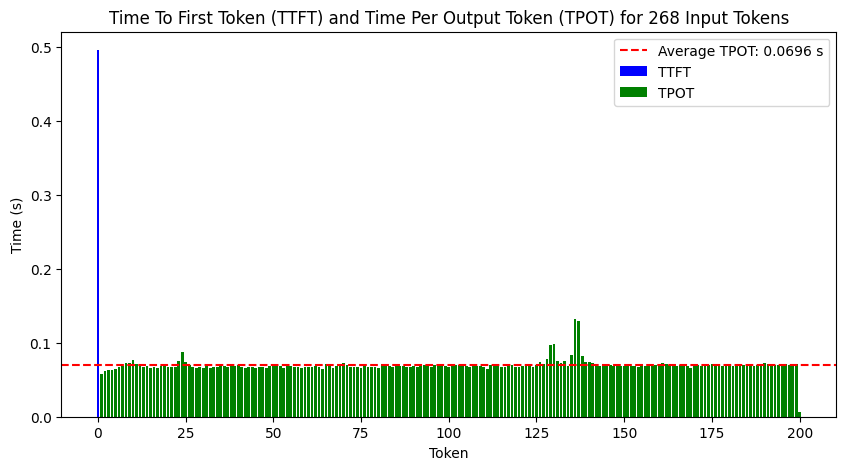

In [55]:
# 60 tokens
prompt = """Write a love song about a couple deeply in love, reflecting on shared moments and their unbreakable bond. Capture the warmth of their connection, joy and the strength that keeps them close through challenges. Use vivid imagery to convey their deep, lasting commitment."""

plot_llm_streaming_times(llm, prompt)

TTFT: 1.1438
AVG TPOT: 0.0701


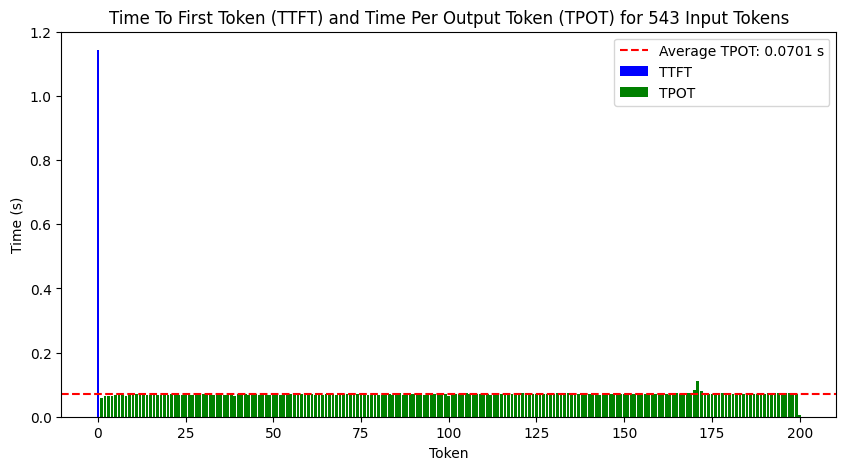

In [56]:
# 120 tokens
prompt = """Write a heartfelt love song about a couple deeply in love, expressing their passion and emotions as they reflect on the moments they've shared. Capture the warmth of their connection, the joy they feel together, and the unbreakable bond that keeps them close through every challenge life brings. Highlight the beauty of their relationship, using vivid imagery, poetic language, and tender emotions. Create verses and a memorable chorus that convey love's deep power and enduring strength, symbolizing their unending commitment to one another. """

plot_llm_streaming_times(llm, prompt)
